In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahmedshahriarsakib/usa-real-estate-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/albek/.cache/kagglehub/datasets/ahmedshahriarsakib/usa-real-estate-dataset/versions/25


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
df = pd.read_csv(path + "/realtor-data.zip.csv")

Сначала переведем акры и футы в квадратные метры

In [3]:
coef_acr = 4046.856
coef_house_size = 1/10.76

df["land_size"] = df["acre_lot"] * coef_acr
df["house_size_meteres"] = df["house_size"] * coef_house_size
df = df.drop(columns=["acre_lot", "house_size"])

Очистим данные.
Разделим признаки на непрерывне, дискретные, категориальные.
Посчитаем различные оценки средних для столбцов, для которых это имеет смысл(непрерывных, дискретных):

    -Среднее арифметическое
    -Среднее усеченное
    -Медиана
    -Среднее абсолютное отклонение
    -Диспресия
    -MDA
    -и т.д.

In [4]:
#разделение по типам
cont = ["price", "land_size", "house_size_meteres"]
discret = ["bed", "bath"]
catigorial = ["brokered_by", "status", "street", "city", "state", "zip_code", "prev_sold_date"]

In [5]:
#очистка
subset = [col for col in df.columns if col != "prev_sold_date"]
df_cln = df.dropna(subset=subset)
df_cln = df_cln.reset_index(drop=True)

In [3]:
df_cln

NameError: name 'df_cln' is not defined

In [7]:
#для непрерывных данных
dct = {}

for ft in cont:
    di = {}
    di["mean"] = df_cln[ft].mean()
    di["trim_mean"] = stats.trim_mean(df_cln[ft], 0.1)
    di["median"] = df_cln[ft].median()
    di["mad"] = (df_cln[ft] - di["median"]).abs().median()
    tmp = (df_cln[ft] - di["mean"]).abs()
    di["cao"] = tmp.mean()
    di["trim_cao"] = stats.trim_mean(tmp, 0.1)
    di["std"] = df_cln[ft].std()
    di["iqr"] = df_cln[ft].quantile(0.75) - df_cln[ft].quantile(0.25)
    dct[ft] = di

inf = pd.DataFrame.from_dict(dct, orient="index")
inf

,mean,trim_mean,median,mad,cao,trim_cao,std,iqr
price,572234.763794,422338.908968,379000.000000,169100.000000,391149.296573,274373.814421,1.213002e+06,361000.000000
land_size,51562.357137,1335.223281,849.839760,404.685600,95917.152796,50319.122858,3.242434e+06,1294.993920
house_size_meteres,197.112390,178.228167,168.401487,48.698885,77.125353,62.097304,3.888630e+02,103.903346


In [8]:
#для дискретных данных
dct = {}

for ft in discret:
    di = {}
    di["mean"] = df_cln[ft].mean()
    di["trim_mean"] = stats.trim_mean(df_cln[ft], 0.1)
    di["median"] = df_cln[ft].median()
    di["mad"] = (df_cln[ft] - di["median"]).abs().median()
    tmp = (df_cln[ft] - di["mean"]).abs()
    di["cao"] = tmp.mean()
    di["trim_cao"] = stats.trim_mean(tmp, 0.1)
    di["std"] = df_cln[ft].std()
    di["iqr"] = df_cln[ft].quantile(0.75) - df_cln[ft].quantile(0.25)
    dct[ft] = di

inf = pd.DataFrame.from_dict(dct, orient="index")
inf

,mean,trim_mean,median,mad,cao,trim_cao,std,iqr
bed,3.386262,3.289428,3.0,1.0,0.826931,0.677931,1.428695,1.0
bath,2.541929,2.425549,2.0,1.0,0.889330,0.739989,1.363137,1.0


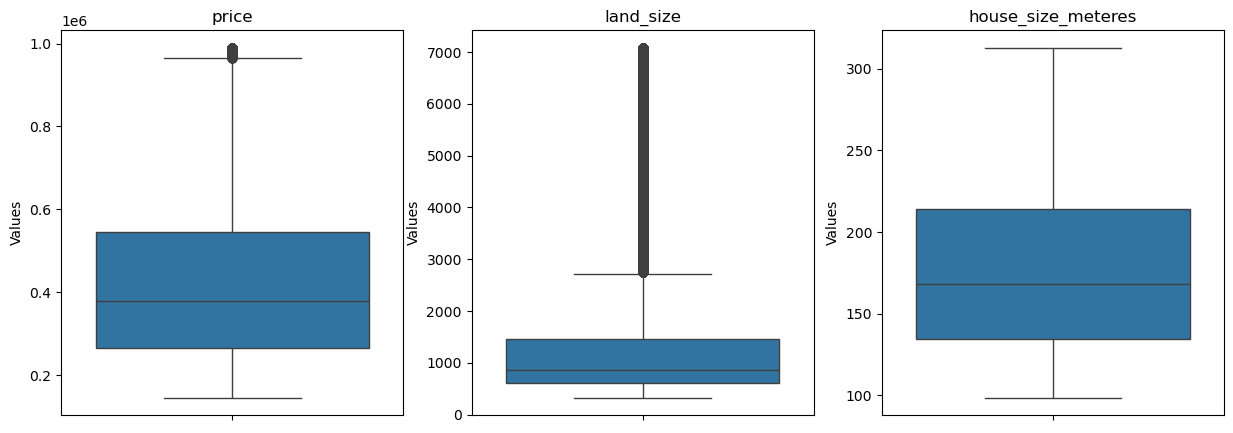

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=len(cont), figsize=(15, 5))

l = len(df_cln)

for i, ft in enumerate(cont):
    tmp = df_cln[ft].sort_values()[l//10:l - l//10]
    sns.boxplot(y=tmp, ax=axes[i])
    axes[i].set_title(ft)
    axes[i].set_ylabel("Values")

plt.show()

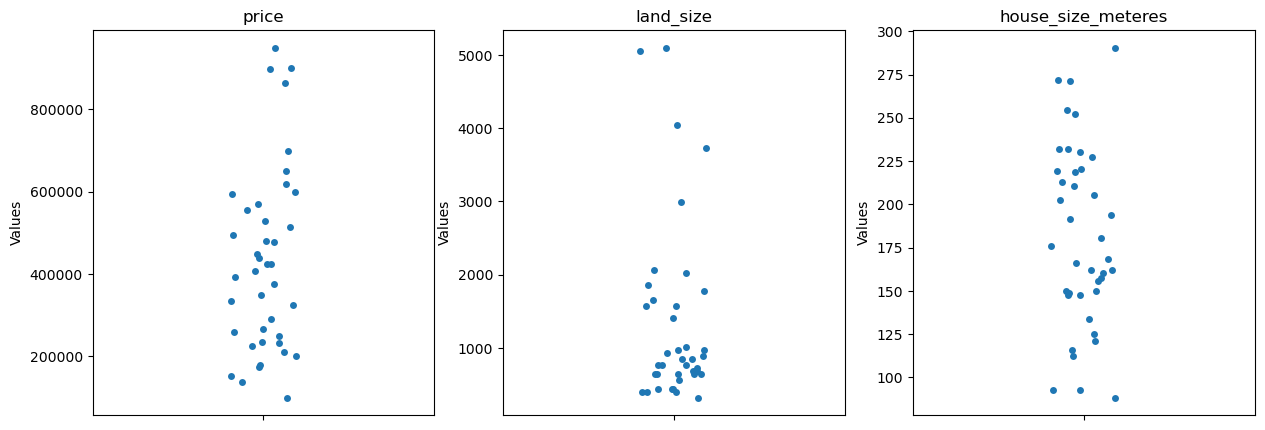

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=len(cont), figsize=(15, 5))

data = df_cln.sample(50)
l = len(data)

for i, ft in enumerate(cont):
    tmp = data[ft].sort_values()[l//10:l - l//10]
    sns.stripplot(y=tmp, ax=axes[i])
    axes[i].set_title(ft)
    axes[i].set_ylabel("Values")

plt.show()

Сделал боксплоты для данных без выбросов потому что иначе их просто не видно из-за выбросов со слишком большим значением

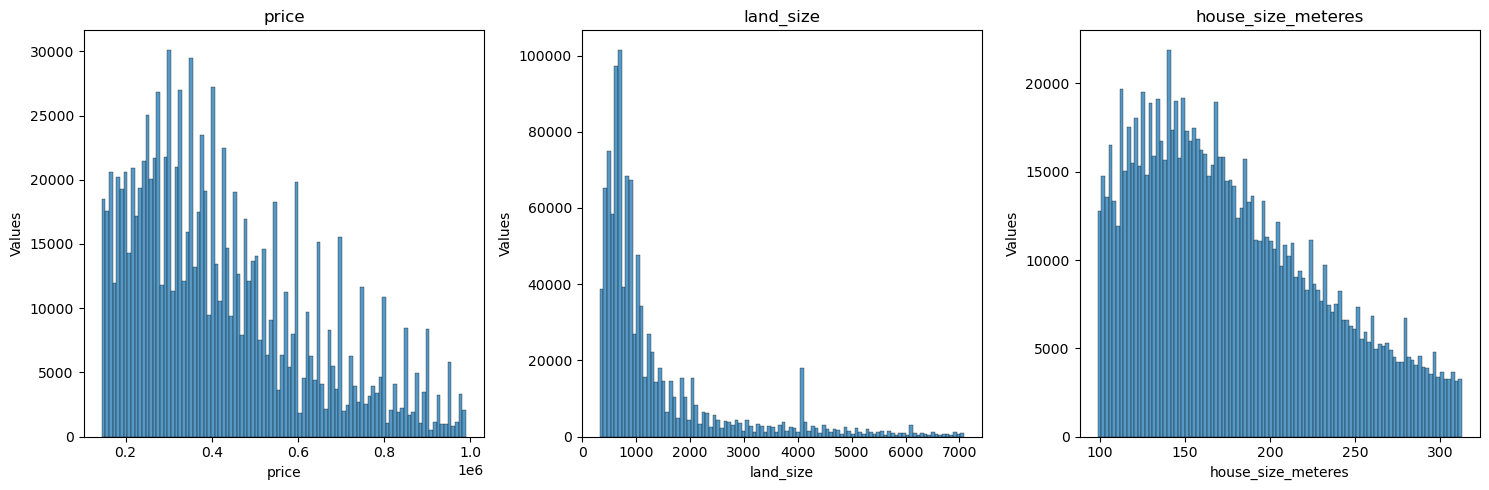

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=len(cont), figsize=(15, 5))

l = len(df_cln)

for i, ft in enumerate(cont):
    tmp = df_cln[ft].sort_values()[l//10:l - l//10]
    #tmp = tmp/sum(tmp)
    sns.histplot(x=tmp, ax=axes[i], bins=100)
    #sns.kdeplot(x=tmp, ax=axes[i])
    axes[i].set_title(ft)
    axes[i].set_ylabel("Values")
plt.tight_layout()

plt.show()

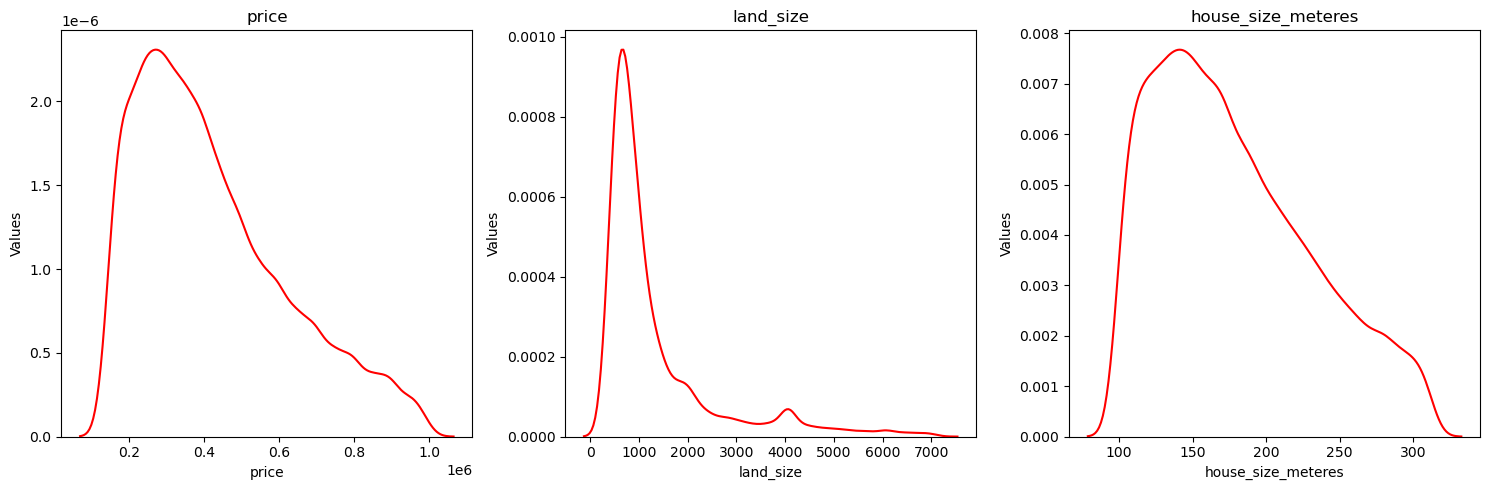

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=len(cont), figsize=(15, 5))

l = len(df_cln)

for i, ft in enumerate(cont):
    tmp = df_cln[ft].sort_values()[l//10:l - l//10]
    sns.kdeplot(x=tmp, ax=axes[i], color="red", bw_adjust=2.0)
    axes[i].set_title(ft)
    axes[i].set_ylabel("Values")
plt.tight_layout()

plt.show()

In [13]:
for i, ft in enumerate(["status", "city", "state"]):
    print(df_cln[ft].value_counts())

status
for_sale    747179
sold        606926
Name: count, dtype: int64
city
Houston         19215
Tucson           7868
Phoenix          7691
Los Angeles      7507
Dallas           7501
                ...  
Vallecito           1
Seacliff            1
Valley Ford         1
Dillon Beach        1
Mount Aukum         1
Name: count, Length: 17109, dtype: int64
state
California              170089
Texas                   145186
Florida                 125715
Arizona                  54462
Pennsylvania             51872
New York                 50719
Georgia                  49132
Illinois                 46624
Washington               46299
Virginia                 44158
Ohio                     41135
North Carolina           36958
Maryland                 32926
Minnesota                32624
Missouri                 30060
Massachusetts            28036
Oklahoma                 26800
Michigan                 22079
Oregon                   21858
Colorado                 19534
New Jersey     

Сделаем матрицу корреляций для наших числовых данных

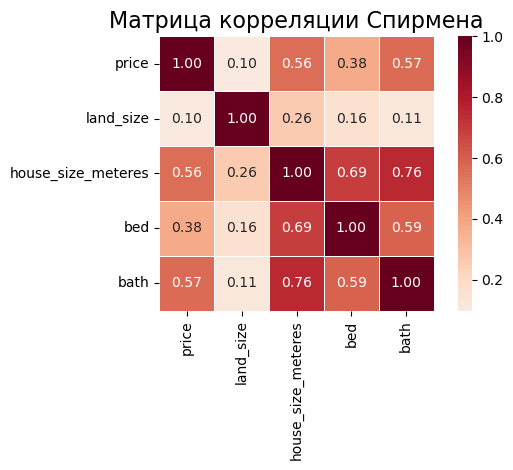

In [14]:
numerical = cont + discret

sns.heatmap(
    df_cln[numerical].corr(method="spearman"),
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    square=True,
    linewidths=0.5
)

plt.title("Матрица корреляции Спирмена", fontsize=16)
plt.tight_layout()
plt.show()

Есть несколько интересных корреляций:

    1.Площадь дома и стоимость
    2.Количестов ванн и стоимость
    3.Количество спален и стоимость(не так сильно но все же)
    4.Площадь дома и количество комнат

Не так сильно коррелируют цена и площадь участка, что странно на мой взгляд

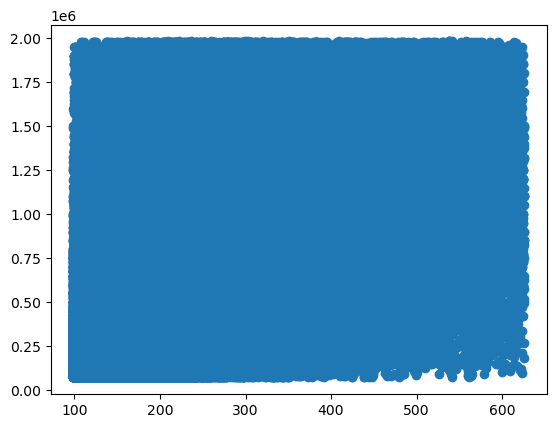

1153833
1354105


In [15]:
#ради эксперимента посмтроим диаграмму рассеяния
#избавимся от выбросов
bound_price_up = 2 * df_cln["price"].quantile(0.9)
bound_price_down = df_cln["price"].quantile(0.1) / 2#граница пола

bound_meteres_up = 2 * df_cln["house_size_meteres"].quantile(0.9)#граница потолка
bound_meteres_down = df_cln["house_size_meteres"].quantile(0.1)#граница пола

df_sample = df_cln[(df_cln["price"] >= bound_price_down) & (df_cln["price"] <= bound_price_up)]
df_sample = df_sample[(df_sample["house_size_meteres"] >= bound_meteres_down) & (df_sample["house_size_meteres"] <= bound_meteres_up)]
plt.scatter(data=df_sample, x="house_size_meteres", y="price")
plt.show()
print(len(df_sample))
print(len(df_cln))

видимо данных слишком много

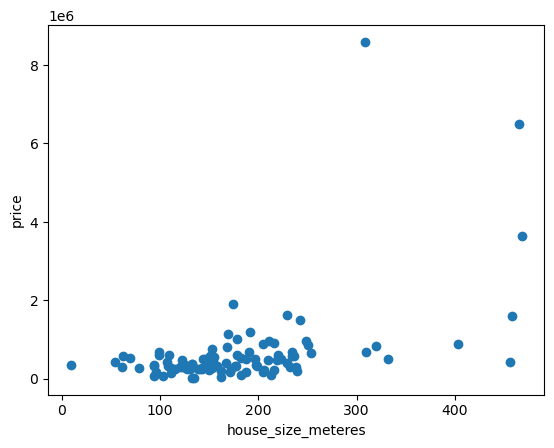

In [16]:
df_sample = df_cln.sample(100)
plt.scatter(data=df_sample, x="house_size_meteres", y="price")
plt.xlabel("house_size_meteres")
plt.ylabel("price")
plt.show()

Что-то похожее на линейную зависимость имеется

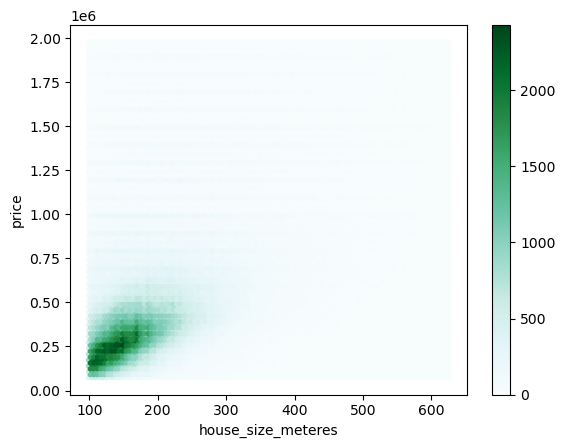

In [17]:
#так как данных слишком много построим сетку из шестиугольных карзин
#избавимся от выбросов
bound_price_up = 2 * df_cln["price"].quantile(0.9)
bound_price_down = df_cln["price"].quantile(0.1) / 2#граница пола

bound_meteres_up = 2 * df_cln["house_size_meteres"].quantile(0.9)#граница потолка
bound_meteres_down = df_cln["house_size_meteres"].quantile(0.1)#граница пола

df_sample = df_cln[(df_cln["price"] >= bound_price_down) & (df_cln["price"] <= bound_price_up)]
df_sample = df_sample[(df_sample["house_size_meteres"] >= bound_meteres_down) & (df_sample["house_size_meteres"] <= bound_meteres_up)]
df_sample.plot.hexbin(x="house_size_meteres", y="price")
plt.show()

Тут уже лучше видно что какая-то все-таки линейная зависимость присутствует

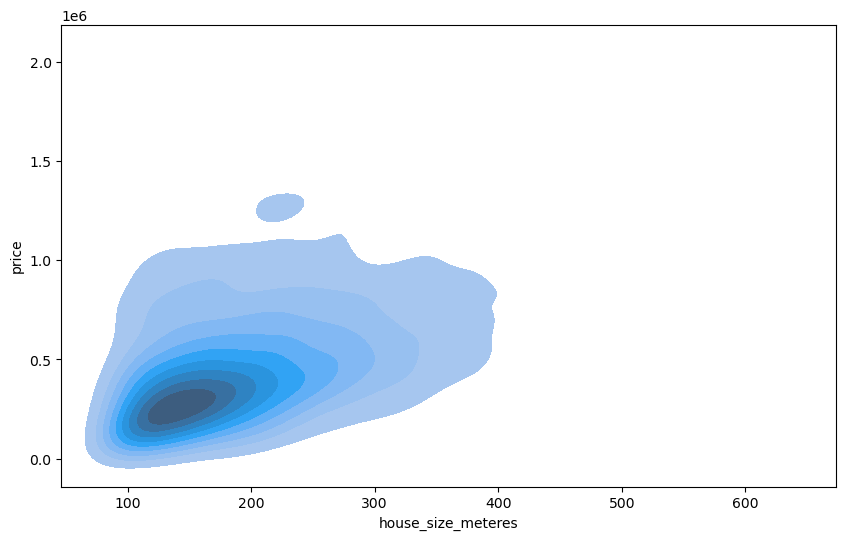

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
df_smp = df_sample.sample(10000)
sns.kdeplot(
    x=df_smp["house_size_meteres"], 
    y=df_smp["price"], 
    ax=ax,
    fill=True,  # Заливка контуров
    thresh=0.1, # Порог для минимальной плотности
    levels=10   # Количество уровней контуров
)

ax.set_xlabel("house_size_meteres")
ax.set_ylabel("price")
plt.show()

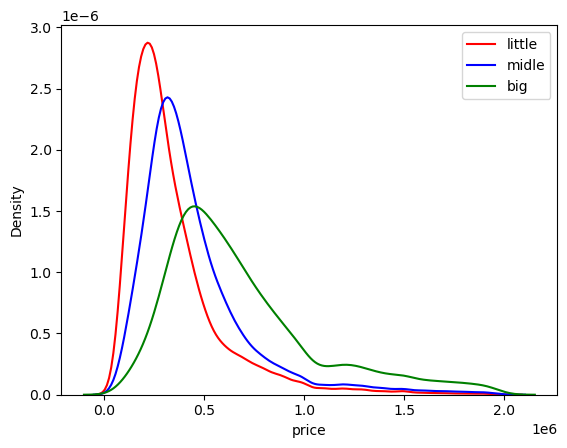

In [19]:
#условное распределение
def cdplot(data, x, cat):
    colors = ['red', 'blue', 'green', 'orange', 'purple', 
          'brown', 'pink', 'gray', 'olive', 'cyan']
    y = data[cat].unique()
    for i, c in enumerate(y):
        data_part = data[data[cat]==c]
        sns.kdeplot(x=data_part[x], bw_adjust=2.0, color=colors[i], label=c)

#создадим сегменты для размера дома в df_sample по кваниилям 0 - 0.33, 0.33 - 0.70, 0.70 - 1 соответсвенно маленькие средние и большие
df_sample["house_size_category"] = pd.qcut(df_sample["house_size_meteres"], q=[0, 0.33, 0.70, 1], labels=["little", "midle", "big"])
cdplot(data=df_sample, x="price", cat="house_size_category")
plt.legend()

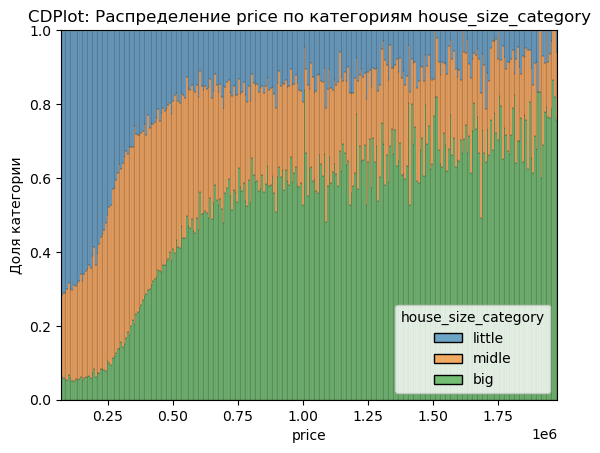

In [20]:
def cdplot_simple(data, x, cat):
    # Гистограмма с заполнением - ближе к концепции cdplot
    sns.histplot(data=data, x=x, hue=cat, multiple="fill", 
                 stat="probability", alpha=0.6, label=data[cat].unique)
    plt.ylabel('Доля категории')
    plt.xlabel(x)
    plt.title(f'CDPlot: Распределение {x} по категориям {cat}')

# Использование
cdplot_simple(data=df_sample, x="price", cat="house_size_category")
plt.show()

Доля больших домов с увеличением цены растет а маленьких уменьшается что в принципе логично 

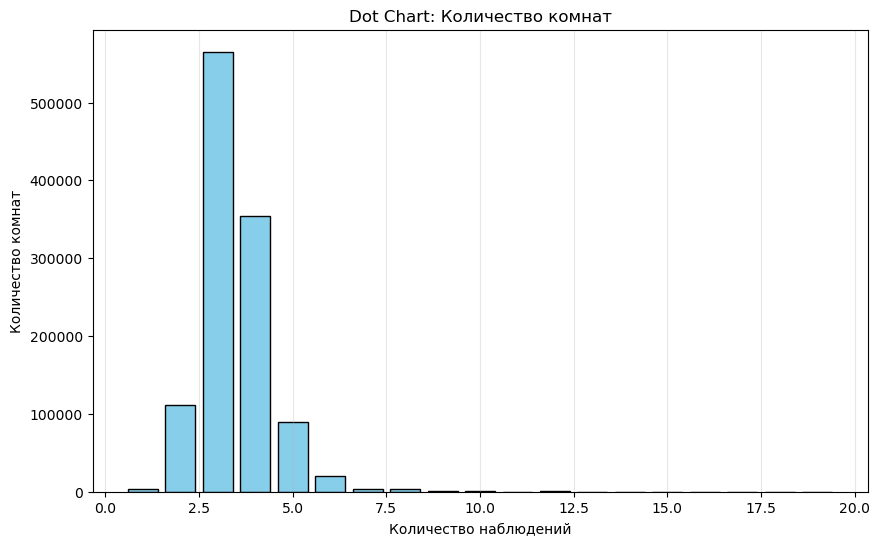

In [21]:
# Создание bar plot
plt.figure(figsize=(10, 6))
data = df_sample[df_sample["bed"] < 20]

# Правильный способ - получаем значения и частоты
value_counts = data["bed"].value_counts().sort_index()

plt.bar(value_counts.index, value_counts.values,
         color='skyblue', edgecolor='black')

# Настройки
plt.title('Dot Chart: Количество комнат')
plt.xlabel('Количество наблюдений')
plt.ylabel('Количество комнат')
plt.grid(axis='x', alpha=0.3)  # Сетка по горизонтали

plt.show()

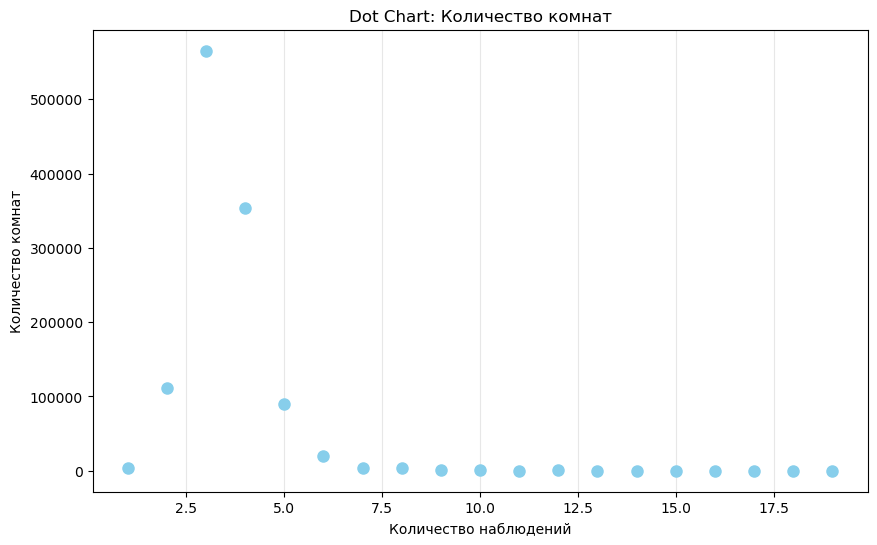

In [22]:
# Создание dot_chart
plt.figure(figsize=(10, 6))
data = df_sample[df_sample["bed"] < 20]

# Правильный способ - получаем значения и частоты
value_counts = data["bed"].value_counts().sort_index()

plt.plot(value_counts.index, value_counts.values, 'o', 
         color='skyblue', markersize=8)

# Настройки
plt.title('Dot Chart: Количество комнат')
plt.xlabel('Количество наблюдений')
plt.ylabel('Количество комнат')
plt.grid(axis='x', alpha=0.3)  # Сетка по горизонтали

plt.show()

Так как у меня довольно большая выборка и судя по тому что я прочитал в интернете про Q-test Диксона работает с нормализлванными выборками малого объема, я придумал что-то странное.
Во-первых, чтобы алгоритм не был слишком громоздким для всех эллементов которые находятся между 0.1 и 0.9 (part1) квантилями мы говорим что они не выбросы, а для остальных берем случайную выборку из 9 эллементов (из part1) добавляем к ним новый эллемент и проводим q_test

In [23]:
#возвращаем результат для первого и последнего эллементов потом разбираемся
#очистка
def Q_test_ten(x, Q_criterion=0.412):
    x_s = sorted(x)
    Q1 = (x_s[1] - x_s[0])/(x_s[-1] - x_s[0])
    Q2 = (x_s[-1] - x_s[-2])/(x_s[-1] - x_s[0])
    return Q1 < Q_criterion, Q2 < Q_criterion

data=df_cln.sort_values(by="price")
df_cln["Q_test_price"] = True
l = len(data)
part1 = data[: l//10]
part2 = data[l//10: l - l//10]
part3 = data[l - l//10:]
x = part2.sample(9)["price"].tolist()
for idx in part1.index:
    x1 = df_cln.loc[idx, "price"]
    tmp = x.copy()
    tmp.append(x1)
    df_cln.loc[idx, "Q_test_price"] = Q_test_ten(tmp, Q_criterion = 0.2)[0]
for idx in part3.index:
    x1 = df_cln.loc[idx, "price"]
    tmp = x.copy()
    tmp.append(x1)
    df_cln.loc[idx, "Q_test_price"] = Q_test_ten(tmp, Q_criterion = 0.2)[1]

df_cln[df_cln["Q_test_price"] == False]

,brokered_by,status,price,bed,bath,street,city,state,zip_code,prev_sold_date,land_size,house_size_meteres,Q_test_price
1,52707.0,for_sale,80000.0,4.0,2.0,1902874.0,Adjuntas,Puerto Rico,601.0,NaN,323.74848,141.914498,False
2,103379.0,for_sale,67000.0,2.0,1.0,1404990.0,Juana Diaz,Puerto Rico,795.0,NaN,607.02840,69.516729,False
5,1205.0,for_sale,50000.0,3.0,1.0,1298094.0,Ciales,Puerto Rico,639.0,NaN,809.37120,189.591078,False
6,50739.0,for_sale,71600.0,3.0,2.0,1048466.0,Ponce,Puerto Rico,731.0,NaN,323.74848,97.583643,False
9,52707.0,for_sale,89000.0,3.0,2.0,1902814.0,Isabela,Puerto Rico,662.0,NaN,54187.40184,102.788104,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353781,85499.0,sold,3750000.0,7.0,13.0,32348.0,Kennewick,Washington,99338.0,2022-01-31,24240.66744,1970.260223,False
1353890,109603.0,sold,1950000.0,4.0,2.0,489736.0,Kennewick,Washington,99336.0,2022-02-28,4653.88440,1989.033457,False
1354015,105917.0,sold,1349000.0,4.0,4.0,838633.0,Walla Walla,Washington,99362.0,2021-11-08,3804.04464,280.111524,False
1354043,105917.0,sold,1250000.0,3.0,3.0,234882.0,Walla Walla,Washington,99362.0,2021-12-27,4046.85600,217.472119,False


In [24]:
# попробуем добавить выбросы
df_cln[df_cln["Q_test_price"] == False]["price"].sort_values()

307584            1.0
307697            1.0
488076            1.0
488559            1.0
487489            1.0
             ...     
235278    150000000.0
681073    160000000.0
647895    165000000.0
50855     169000000.0
670155    515000000.0
Name: price, Length: 193754, dtype: float64

Вообще для уровня значимости 0.9 и нормальных данных по-хорошему надо брать значение критерия 0.412, но если так делсть то отбрасывается не сильно меньше чем если брать 0.2, но при этом, если брать 0.2, то будут отбрасываться значения и из part1

In [25]:
data=df_cln.sort_values(by="house_size_meteres")
df_cln["Q_test_size"] = True
l = len(data)
part1 = data[: l//10]
part2 = data[l//10: l - l//10]
part3 = data[l - l//10:]
x = part2.sample(9)["house_size_meteres"].tolist()
for idx in part1.index:
    x1 = df_cln.loc[idx, "house_size_meteres"]
    tmp = x.copy()
    tmp.append(x1)
    df_cln.loc[idx, "Q_test_size"] = Q_test_ten(tmp, Q_criterion = 0.2)[0]
for idx in part3.index:
    x1 = df_cln.loc[idx, "house_size_meteres"]
    tmp = x.copy()
    tmp.append(x1)
    df_cln.loc[idx, "Q_test_size"] = Q_test_ten(tmp, Q_criterion = 0.2)[1]

df_cln[df_cln["Q_test_size"] == False]

,brokered_by,status,price,bed,bath,street,city,state,zip_code,prev_sold_date,land_size,house_size_meteres,Q_test_price,Q_test_size
0,103378.0,for_sale,105000.0,3.0,2.0,1962661.0,Adjuntas,Puerto Rico,601.0,NaN,485.62272,85.501859,True,False
2,103379.0,for_sale,67000.0,2.0,1.0,1404990.0,Juana Diaz,Puerto Rico,795.0,NaN,607.02840,69.516729,False,False
6,50739.0,for_sale,71600.0,3.0,2.0,1048466.0,Ponce,Puerto Rico,731.0,NaN,323.74848,97.583643,False,False
8,65672.0,for_sale,300000.0,5.0,3.0,1946226.0,Las Marias,Puerto Rico,670.0,NaN,30189.54576,502.137546,True,False
10,52707.0,for_sale,150000.0,3.0,2.0,1773902.0,Juana Diaz,Puerto Rico,795.0,NaN,323.74848,97.118959,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354059,23062.0,sold,287000.0,2.0,1.0,1482197.0,Walla Walla,Washington,99362.0,2022-03-18,566.55984,90.055762,True,False
1354084,23062.0,sold,245000.0,2.0,1.0,218392.0,Walla Walla,Washington,99362.0,2022-03-09,687.96552,77.323420,True,False
1354100,23009.0,sold,359900.0,4.0,2.0,353094.0,Richland,Washington,99354.0,2022-03-25,1335.46248,334.572491,True,False
1354103,53618.0,sold,179900.0,2.0,1.0,761379.0,Richland,Washington,99354.0,2022-03-24,364.21704,86.710037,True,False


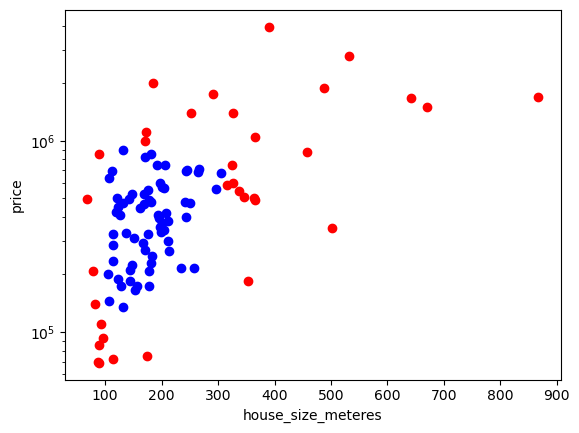

In [26]:
df_sample = df_cln.sample(100)
plt.scatter(data=df_sample[df_sample["Q_test_price"] & df_sample["Q_test_size"]], x="house_size_meteres", y="price", color="blue")
plt.scatter(data=df_sample[~(df_sample["Q_test_price"] & df_sample["Q_test_size"])], x="house_size_meteres", y="price", color="red")
plt.xlabel("house_size_meteres")
plt.yscale('log')#логарифмировал шкалу чтобы лучше было видно
plt.ylabel("price")
plt.show()

Теперь напишем критерий Граббса

In [27]:
from scipy import stats
import numpy as np

def Grabbs(x_sorted, mean, std, alfa=0.05):
    s = ""
    if (mean - x_sorted[0]) > (x_sorted[-1] - mean):
        s = "first"
        G = (mean - x_sorted[0]) / std
    else:
        s = "last"
        G = (x_sorted[-1] - mean) / std
    
    N = len(x_sorted)
    t = stats.t.ppf(alfa / (2 * N), N - 2)
    G_crit = ((N - 1) / np.sqrt(N)) * np.sqrt(t**2 / (N - 2 + t**2))

    if G > G_crit:
        return s
    else:
        return "noone"  # выбросов нет

data = df_cln.sort_values(by="price")
df_cln["Grabbs_price"] = True
indexes = data.index
x = np.array(data["price"])
mean = x.mean()
std = x.std(ddof=1)
N = len(x)

while N > 2:
    s = Grabbs(x, mean, std)
    if s == "noone":
        break

    if s == "first":
        df_cln.loc[indexes[0], "Grabbs_price"] = False
        deleted = x[0]
        x = x[1:]
        indexes = indexes[1:]
    elif s == "last":
        df_cln.loc[indexes[-1], "Grabbs_price"] = False
        deleted = x[-1]
        x = x[:-1]
        indexes = indexes[:-1]

    #пересчет статистик
    N_new = N - 1
    mean_new = (mean * N - deleted) / N_new
    if N_new >= 2:
        std_new = np.sqrt(((std**2 * (N - 1)) - (deleted - mean)**2) / (N_new - 1))
    else:
        break
    
    mean = mean_new
    std = std_new
    N = N_new

# Оставшееся заполняем True
df_cln.loc[indexes, "Grabbs_price"] = True

In [28]:
df_cln[df_cln["Grabbs_price"]==False]

,brokered_by,status,price,bed,bath,street,city,state,zip_code,prev_sold_date,land_size,house_size_meteres,Q_test_price,Q_test_size,Grabbs_price
39,63639.0,for_sale,3900000.0,6.0,6.0,269007.0,Penuelas,Puerto Rico,624.0,NaN,3.804045e+03,864.033457,False,False,False
51,55906.0,for_sale,10000000.0,6.0,5.0,1233063.0,Aguada,Puerto Rico,602.0,NaN,4.856227e+02,557.620818,False,False,False
165,102909.0,for_sale,11500000.0,4.0,5.0,974575.0,Dorado,Puerto Rico,646.0,NaN,8.012775e+03,650.557621,False,False,False
166,64069.0,for_sale,3500000.0,4.0,4.0,595727.0,Dorado,Puerto Rico,646.0,NaN,9.712454e+02,232.342007,False,True,False
168,102909.0,for_sale,5000000.0,3.0,4.0,388280.0,Dorado,Puerto Rico,646.0,NaN,4.006387e+03,325.278810,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350174,50353.0,sold,3850000.0,5.0,5.0,739888.0,Cle Elum,Washington,98922.0,2021-12-09,2.104365e+03,427.509294,False,False,False
1350235,108288.0,sold,12500000.0,5.0,3.0,967662.0,Ellensburg,Washington,98926.0,2022-04-08,3.873893e+06,264.776952,False,True,False
1351937,22910.0,sold,2950000.0,5.0,4.0,1347003.0,Deer Park,Washington,99006.0,2021-12-31,6.300550e+05,924.907063,False,False,False
1352399,100877.0,sold,6500000.0,5.0,6.0,1455191.0,Spokane,Washington,99208.0,2021-12-17,2.488816e+05,844.795539,False,False,False


In [29]:
data = df_cln.sort_values(by="house_size_meteres")
df_cln["Grabbs_size"] = True
indexes = data.index
x = np.array(data["house_size_meteres"])
mean = x.mean()
std = x.std(ddof=1)
N = len(x)

while N > 2:
    s = Grabbs(x, mean, std)
    if s == "noone":
        break

    if s == "first":
        df_cln.loc[indexes[0], "Grabbs_size"] = False
        deleted = x[0]
        x = x[1:]
        indexes = indexes[1:]
    elif s == "last":
        df_cln.loc[indexes[-1], "Grabbs_size"] = False
        deleted = x[-1]
        x = x[:-1]
        indexes = indexes[:-1]

    #пересчет статистик
    N_new = N - 1
    mean_new = (mean * N - deleted) / N_new
    if N_new >= 2:
        std_new = np.sqrt(((std**2 * (N - 1)) - (deleted - mean)**2) / (N_new - 1))
    else:
        break
    
    mean = mean_new
    std = std_new
    N = N_new

# Оставшееся заполняем True
df_cln.loc[indexes, "Grabbs_size"] = True

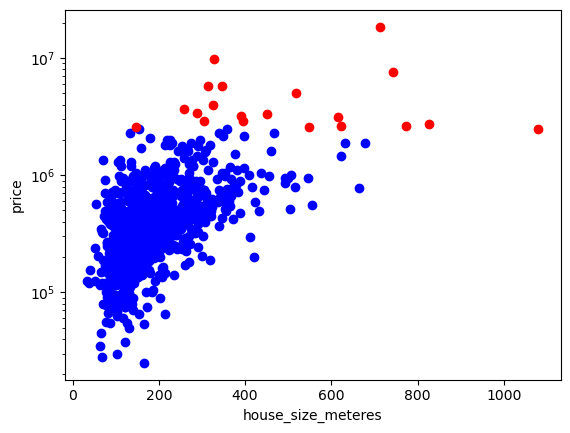

In [30]:
df_sample = df_cln.sample(1000)
plt.scatter(data=df_sample[df_sample["Grabbs_price"] & df_sample["Grabbs_size"]], x="house_size_meteres", y="price", color="blue")
plt.scatter(data=df_sample[~(df_sample["Grabbs_price"] & df_sample["Grabbs_size"])], x="house_size_meteres", y="price", color="red")
plt.xlabel("house_size_meteres")
plt.yscale('log')#логарифмировал шкалу чтобы лучше было видно
plt.ylabel("price")
plt.show()

Пропусками займусь позже сначала займусь обработкой нормальных данных

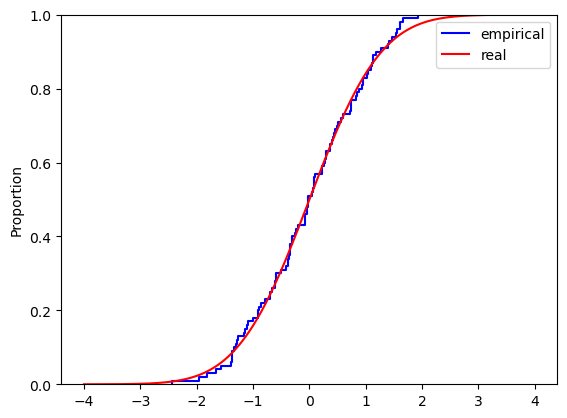

In [31]:
norm_little = np.random.normal(size = 100)
sns.ecdfplot(norm_little, color="blue", label="empirical")

x = np.linspace(-4, 4, 1000)
y = stats.norm.cdf(x)  # PDF стандартного нормального распределения
plt.plot(x, y, color="red", label="real")
plt.legend()

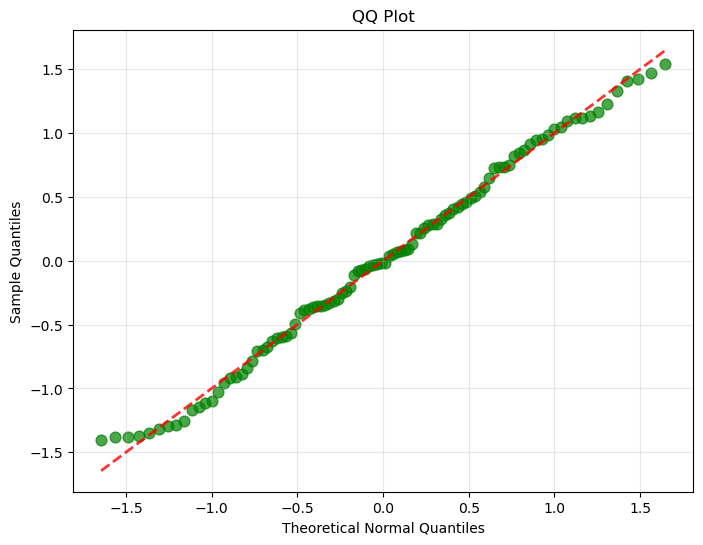

In [53]:
# анализ через квантили
q = np.linspace(0.05, 0.95, 100)
real = np.array([stats.norm.ppf(alfa) for alfa in q])
empirical = np.array([np.quantile(norm_little, alfa) for alfa in q])

# Строим QQ plot
plt.figure(figsize=(8, 6))
plt.scatter(real, empirical, alpha=0.7, color='green', s=60)

# Линия идеального соответствия
min_val = min(real.min(), empirical.min())
max_val = max(real.max(), empirical.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, linewidth=2, label='y = x')

plt.xlabel('Theoretical Normal Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('QQ Plot')
plt.grid(True, alpha=0.3)
plt.show()

Text(0.5, 0, 'level*100')

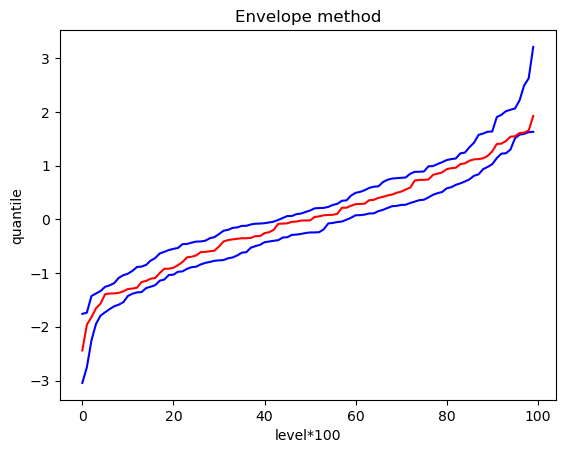

In [33]:
# метод огибающих
#генерируем n нормальных выборок размера 100 берем порядковый статистики и составляем из них интервалы
def envelope(n):
    #создаем матрицу n * 100
    tmp = np.array([sorted(np.random.normal(size = 100)) for i in range(n)])
    return [tmp.min(axis=0), tmp.max(axis=0)]

plt.plot(range(0, 100), envelope(10)[0], color="blue")
plt.plot(range(0, 100), envelope(10)[1], color="blue")
plt.plot(range(0, 100), sorted(norm_little), color="red")
plt.title("Envelope method")
plt.ylabel("quantile")
plt.xlabel("level*100")


In [34]:
from scipy.stats import anderson, kstest, shapiro
from statsmodels.stats.diagnostic import lilliefors

# 1. Критерий Колмогорова-Смирнова
print("\n1. КРИТЕРИЙ КОЛМОГОРОВА-СМИРНОВА:")
# Оцениваем параметры из данных
params = stats.norm.fit(norm_little)
ks_stat, ks_pvalue = kstest(norm_little, 'norm', params)
print(f"   Статистика: {ks_stat:.4f}")
print(f"   p-value: {ks_pvalue:.4f}")
if ks_pvalue > 0.05:
    print("Не отвергаем: данные соответствуют нормальному распределению")
else:
    print("Отвергаем: данные не соответствуют нормальному распределению")

# 2. Критерий Шапиро-Уилка
print("\n2. КРИТЕРИЙ ШАПИРО-УИЛКА:")
shapiro_stat, shapiro_pvalue = shapiro(norm_little)
print(f"   Статистика: {shapiro_stat:.4f}")
print(f"   p-value: {shapiro_pvalue:.4f}")
if shapiro_pvalue > 0.05:
    print("Не отвергаем: данные соответствуют нормальному распределению")
else:
    print("Отвергаем: данные не соответствуют нормальному распределению")

# 3. Критерий Андерсона-Дарлинга
print("\n3. КРИТЕРИЙ АНДЕРСОНА-ДАРЛИНГА:")
anderson_result = anderson(norm_little)
print(f"   Статистика: {anderson_result.statistic:.4f}")
print("   Критические значения:")
significance_levels = [15, 10, 5, 2.5, 1]  # проценты
for i, sl in enumerate(significance_levels):
    critical_value = anderson_result.critical_values[i]
    print(f"     {sl}%: {critical_value:.4f}", end="")
    if anderson_result.statistic < critical_value:
        print(" Yes")
    else:
        print(" No")

# 4. Критерий Крамера-фон-Мизеса
print("\n4. КРИТЕРИЙ КРАМЕРА-ФОН-МИЗЕСА:")
# Используем реализацию из scipy
class CramerVonMisesResult:
    def __init__(self, statistic, pvalue):
        self.statistic = statistic
        self.pvalue = pvalue

def cramervonmises_normal(x):
    """Критерий Крамера-фон-Мизеса для нормальности"""
    from scipy.stats import cramervonmises
    # Стандартизуем данные
    x_standardized = (x - np.mean(x)) / np.std(x, ddof=1)
    result = cramervonmises(x_standardized, 'norm')
    return CramerVonMisesResult(result.statistic, result.pvalue)

cvm_result = cramervonmises_normal(norm_little)
print(f"   Статистика: {cvm_result.statistic:.4f}")
print(f"   p-value: {cvm_result.pvalue:.4f}")
if cvm_result.pvalue > 0.05:
    print("Не отвергаем: данные соответствуют нормальному распределению")
else:
    print("Отвергаем: данные не соответствуют нормальному распределению")

# 5. Критерий Колмогорова-Смирнова (модификация Лиллиефорса)
print("\n5. КРИТЕРИЙ ЛИЛЛИЕФОРСА (модификация Колмогорова-Смирнова):")
# Используем statsmodels для критерия Лиллиефорса
from statsmodels.stats.diagnostic import lilliefors
lillie_stat, lillie_pvalue = lilliefors(norm_little, dist='norm')
print(f"   Статистика: {lillie_stat:.4f}")
print(f"   p-value: {lillie_pvalue:.4f}")
if lillie_pvalue > 0.05:
    print("Не отвергаем: данные соответствуют нормальному распределению")
else:
    print("Отвергаем: данные не соответствуют нормальному распределению")
    
# 6. Критерий Шапиро-Франсия
print("\n6. КРИТЕРИЙ ШАПИРО-ФРАНСИЯ:")
def shapiro_francia(x):
    """Критерий Шапиро-Франсия для нормальности"""
    from scipy.stats import norm
    n = len(x)
    x_sorted = np.sort(x)
    
    # Вычисляем ожидаемые нормальные порядковые статистики
    expected_normals = norm.ppf((np.arange(1, n+1) - 3/8) / (n + 1/4))
    
    # Вычисляем статистику Шапиро-Франсия
    numerator = np.sum(expected_normals * x_sorted)**2
    denominator = np.sum(expected_normals**2) * np.sum((x_sorted - np.mean(x))**2)
    W = numerator / denominator
    
    # Преобразуем статистику для получения p-value (приближенно)
    # Используем приближение Royston (1993)
    u = np.log(n)
    v = np.log(u)
    mu = -1.2725 + 1.0521 * (v - u)
    sigma = 1.0308 - 0.26758 * (v + 2/u)
    
    z = (np.log(1 - W) - mu) / sigma
    p_value = 1 - norm.cdf(z)
    
    return W, p_value

sf_stat, sf_pvalue = shapiro_francia(norm_little)
print(f"   Статистика: {sf_stat:.4f}")
print(f"   p-value: {sf_pvalue:.4f}")
if sf_pvalue > 0.05:
    print("Не отвергаем: данные соответствуют нормальному распределению")
else:
    print("Отвергаем: данные не соответствуют нормальному распределению")

# Сводная таблица результатов
print("\n" + "=" * 70)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("=" * 70)

results = [
    ("Колмогорова-Смирнова", ks_stat, ks_pvalue),
    ("Шапиро-Уилка", shapiro_stat, shapiro_pvalue),
    ("Андерсона-Дарлинга", anderson_result.statistic, "N/A"),  # p-value не предоставляется
    ("Крамера-фон-Мизеса", cvm_result.statistic, cvm_result.pvalue),
    ("Лиллиефорса", lillie_stat, lillie_pvalue),
    ("Шапиро-Франсия", sf_stat, sf_pvalue)
]

print(f"{'Критерий':<25} {'Статистика':<12} {'p-value':<10} {'Вывод':<10}")
print("-" * 60)
for name, stat, pval in results:
    if pval == "N/A":
        conclusion = "Сравнить с критич. знач."
    elif pval > 0.05:
        conclusion = "Нормальность"
    else:
        conclusion = "Не нормальность"
    print(f"{name:<25} {stat:<12.4f} {str(pval):<10} {conclusion:<10}")


1. КРИТЕРИЙ КОЛМОГОРОВА-СМИРНОВА:
   Статистика: 0.0519
   p-value: 0.9376
Не отвергаем: данные соответствуют нормальному распределению

2. КРИТЕРИЙ ШАПИРО-УИЛКА:
   Статистика: 0.9874
   p-value: 0.4626
Не отвергаем: данные соответствуют нормальному распределению

3. КРИТЕРИЙ АНДЕРСОНА-ДАРЛИНГА:
   Статистика: 0.2853
   Критические значения:
     15%: 0.5550 Yes
     10%: 0.6320 Yes
     5%: 0.7590 Yes
     2.5%: 0.8850 Yes
     1%: 1.0530 Yes

4. КРИТЕРИЙ КРАМЕРА-ФОН-МИЗЕСА:
   Статистика: 0.0346
   p-value: 0.9594
Не отвергаем: данные соответствуют нормальному распределению

5. КРИТЕРИЙ ЛИЛЛИЕФОРСА (модификация Колмогорова-Смирнова):
   Статистика: 0.0507
   p-value: 0.7633
Не отвергаем: данные соответствуют нормальному распределению

6. КРИТЕРИЙ ШАПИРО-ФРАНСИЯ:
   Статистика: 0.9904
   p-value: 0.6078
Не отвергаем: данные соответствуют нормальному распределению

СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
Критерий                  Статистика   p-value    Вывод     
-------------------------------

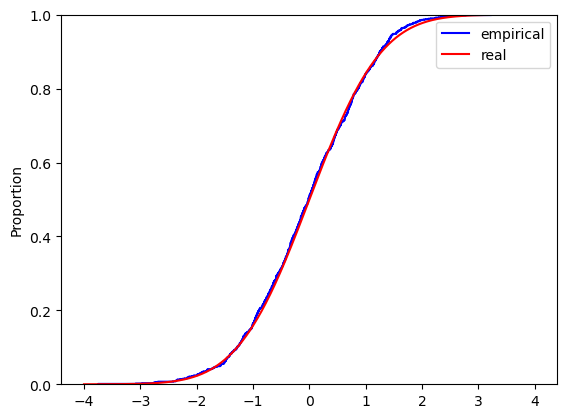

In [35]:
norm_big = np.random.normal(size = 1000)
sns.ecdfplot(norm_big, color="blue", label="empirical")

x = np.linspace(-4, 4, 1000)
y = stats.norm.cdf(x)  # PDF стандартного нормального распределения
plt.plot(x, y, color="red", label="real")
plt.legend()

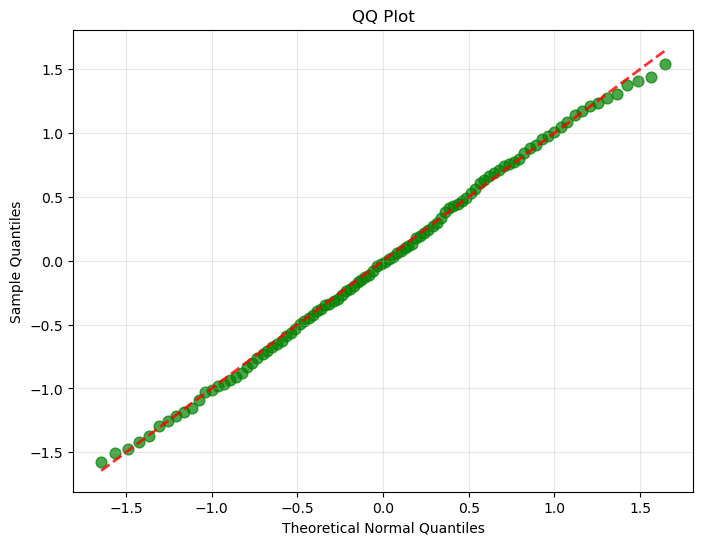

In [54]:
# анализ через квантили
q = np.linspace(0.05, 0.95, 100)
real = np.array([stats.norm.ppf(alfa) for alfa in q])
empirical = np.array([np.quantile(norm_big, alfa) for alfa in q])

# Строим QQ plot
plt.figure(figsize=(8, 6))
plt.scatter(real, empirical, alpha=0.7, color='green', s=60)

# Линия идеального соответствия
min_val = min(real.min(), empirical.min())
max_val = max(real.max(), empirical.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, linewidth=2, label='y = x')

plt.xlabel('Theoretical Normal Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('QQ Plot')
plt.grid(True, alpha=0.3)
plt.show()

Text(0.5, 0, 'level*1000')

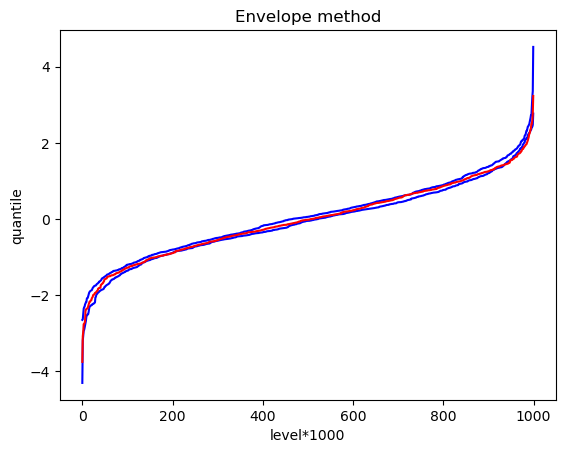

In [37]:
# метод огибающих
#генерируем n нормальных выборок размера 100 берем порядковый статистики и составляем из них интервалы
def envelope(n):
    #создаем матрицу n * 1000
    tmp = np.array([sorted(np.random.normal(size = 1000)) for i in range(n)])
    return [tmp.min(axis=0), tmp.max(axis=0)]

plt.plot(range(0, 1000), envelope(10)[0], color="blue")
plt.plot(range(0, 1000), envelope(10)[1], color="blue")
plt.plot(range(0, 1000), sorted(norm_big), color="red")
plt.title("Envelope method")
plt.ylabel("quantile")
plt.xlabel("level*1000")

In [38]:
from scipy.stats import anderson, kstest, shapiro
from statsmodels.stats.diagnostic import lilliefors

# 1. Критерий Колмогорова-Смирнова
print("\n1. КРИТЕРИЙ КОЛМОГОРОВА-СМИРНОВА:")
# Оцениваем параметры из данных
params = stats.norm.fit(norm_big)
ks_stat, ks_pvalue = kstest(norm_big, 'norm', params)
print(f"   Статистика: {ks_stat:.4f}")
print(f"   p-value: {ks_pvalue:.4f}")
if ks_pvalue > 0.05:
    print("Не отвергаем: данные соответствуют нормальному распределению")
else:
    print("Отвергаем: данные не соответствуют нормальному распределению")

# 2. Критерий Шапиро-Уилка
print("\n2. КРИТЕРИЙ ШАПИРО-УИЛКА:")
shapiro_stat, shapiro_pvalue = shapiro(norm_big)
print(f"   Статистика: {shapiro_stat:.4f}")
print(f"   p-value: {shapiro_pvalue:.4f}")
if shapiro_pvalue > 0.05:
    print("Не отвергаем: данные соответствуют нормальному распределению")
else:
    print("Отвергаем: данные не соответствуют нормальному распределению")

# 3. Критерий Андерсона-Дарлинга
print("\n3. КРИТЕРИЙ АНДЕРСОНА-ДАРЛИНГА:")
anderson_result = anderson(norm_big)
print(f"   Статистика: {anderson_result.statistic:.4f}")
print("   Критические значения:")
significance_levels = [15, 10, 5, 2.5, 1]  # проценты
for i, sl in enumerate(significance_levels):
    critical_value = anderson_result.critical_values[i]
    print(f"     {sl}%: {critical_value:.4f}", end="")
    if anderson_result.statistic < critical_value:
        print(" Yes")
    else:
        print(" No")

# 4. Критерий Крамера-фон-Мизеса
print("\n4. КРИТЕРИЙ КРАМЕРА-ФОН-МИЗЕСА:")
# Используем реализацию из scipy
class CramerVonMisesResult:
    def __init__(self, statistic, pvalue):
        self.statistic = statistic
        self.pvalue = pvalue

def cramervonmises_normal(x):
    """Критерий Крамера-фон-Мизеса для нормальности"""
    from scipy.stats import cramervonmises
    # Стандартизуем данные
    x_standardized = (x - np.mean(x)) / np.std(x, ddof=1)
    result = cramervonmises(x_standardized, 'norm')
    return CramerVonMisesResult(result.statistic, result.pvalue)

cvm_result = cramervonmises_normal(norm_big)
print(f"   Статистика: {cvm_result.statistic:.4f}")
print(f"   p-value: {cvm_result.pvalue:.4f}")
if cvm_result.pvalue > 0.05:
    print("Не отвергаем: данные соответствуют нормальному распределению")
else:
    print("Отвергаем: данные не соответствуют нормальному распределению")

# 5. Критерий Колмогорова-Смирнова (модификация Лиллиефорса)
print("\n5. КРИТЕРИЙ ЛИЛЛИЕФОРСА (модификация Колмогорова-Смирнова):")
# Используем statsmodels для критерия Лиллиефорса
from statsmodels.stats.diagnostic import lilliefors
lillie_stat, lillie_pvalue = lilliefors(norm_big, dist='norm')
print(f"   Статистика: {lillie_stat:.4f}")
print(f"   p-value: {lillie_pvalue:.4f}")
if lillie_pvalue > 0.05:
    print("Не отвергаем: данные соответствуют нормальному распределению")
else:
    print("Отвергаем: данные не соответствуют нормальному распределению")
    
# 6. Критерий Шапиро-Франсия
print("\n6. КРИТЕРИЙ ШАПИРО-ФРАНСИЯ:")
def shapiro_francia(x):
    """Критерий Шапиро-Франсия для нормальности"""
    from scipy.stats import norm
    n = len(x)
    x_sorted = np.sort(x)
    
    # Вычисляем ожидаемые нормальные порядковые статистики
    expected_normals = norm.ppf((np.arange(1, n+1) - 3/8) / (n + 1/4))
    
    # Вычисляем статистику Шапиро-Франсия
    numerator = np.sum(expected_normals * x_sorted)**2
    denominator = np.sum(expected_normals**2) * np.sum((x_sorted - np.mean(x))**2)
    W = numerator / denominator
    
    # Преобразуем статистику для получения p-value (приближенно)
    # Используем приближение Royston (1993)
    u = np.log(n)
    v = np.log(u)
    mu = -1.2725 + 1.0521 * (v - u)
    sigma = 1.0308 - 0.26758 * (v + 2/u)
    
    z = (np.log(1 - W) - mu) / sigma
    p_value = 1 - norm.cdf(z)
    
    return W, p_value

sf_stat, sf_pvalue = shapiro_francia(norm_big)
print(f"   Статистика: {sf_stat:.4f}")
print(f"   p-value: {sf_pvalue:.4f}")
if sf_pvalue > 0.05:
    print("Не отвергаем: данные соответствуют нормальному распределению")
else:
    print("Отвергаем: данные не соответствуют нормальному распределению")

# Сводная таблица результатов
print("\n" + "=" * 70)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("=" * 70)

results = [
    ("Колмогорова-Смирнова", ks_stat, ks_pvalue),
    ("Шапиро-Уилка", shapiro_stat, shapiro_pvalue),
    ("Андерсона-Дарлинга", anderson_result.statistic, "N/A"),  # p-value не предоставляется
    ("Крамера-фон-Мизеса", cvm_result.statistic, cvm_result.pvalue),
    ("Лиллиефорса", lillie_stat, lillie_pvalue),
    ("Шапиро-Франсия", sf_stat, sf_pvalue)
]

print(f"{'Критерий':<25} {'Статистика':<12} {'p-value':<10} {'Вывод':<10}")
print("-" * 60)
for name, stat, pval in results:
    if pval == "N/A":
        conclusion = "Сравнить с критич. знач."
    elif pval > 0.05:
        conclusion = "Нормальность"
    else:
        conclusion = "Не нормальность"
    print(f"{name:<25} {stat:<12.4f} {str(pval):<10} {conclusion:<10}")


1. КРИТЕРИЙ КОЛМОГОРОВА-СМИРНОВА:
   Статистика: 0.0262
   p-value: 0.4893
Не отвергаем: данные соответствуют нормальному распределению

2. КРИТЕРИЙ ШАПИРО-УИЛКА:
   Статистика: 0.9981
   p-value: 0.3331
Не отвергаем: данные соответствуют нормальному распределению

3. КРИТЕРИЙ АНДЕРСОНА-ДАРЛИНГА:
   Статистика: 0.5044
   Критические значения:
     15%: 0.5740 Yes
     10%: 0.6530 Yes
     5%: 0.7840 Yes
     2.5%: 0.9140 Yes
     1%: 1.0880 Yes

4. КРИТЕРИЙ КРАМЕРА-ФОН-МИЗЕСА:
   Статистика: 0.0682
   p-value: 0.7629
Не отвергаем: данные соответствуют нормальному распределению

5. КРИТЕРИЙ ЛИЛЛИЕФОРСА (модификация Колмогорова-Смирнова):
   Статистика: 0.0261
   p-value: 0.1447
Не отвергаем: данные соответствуют нормальному распределению

6. КРИТЕРИЙ ШАПИРО-ФРАНСИЯ:
   Статистика: 0.9980
   p-value: 0.2391
Не отвергаем: данные соответствуют нормальному распределению

СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
Критерий                  Статистика   p-value    Вывод     
-------------------------------

### Теперь займемся пропусками.

Попробуем следующие методы:

    1)Среднее, Медиана
    2)KNN

В качестве тренировки возьмем один числовой и один категориальный столбец(price)

In [39]:
#так как данных слишком много построим сетку из шестиугольных карзин
#избавимся от выбросов
bound_price_up = 2 * df_cln["price"].quantile(0.9)
bound_price_down = df_cln["price"].quantile(0.1) / 2#граница пола

bound_meteres_up = 2 * df_cln["house_size_meteres"].quantile(0.9)#граница потолка
bound_meteres_down = df_cln["house_size_meteres"].quantile(0.1)#граница пола

df_smp1 = df_cln[(df_cln["price"] >= bound_price_down) & (df_cln["price"] <= bound_price_up)]
df_smp1 = df_smp1[(df_smp1["house_size_meteres"] >= bound_meteres_down) & (df_smp1["house_size_meteres"] <= bound_meteres_up)]

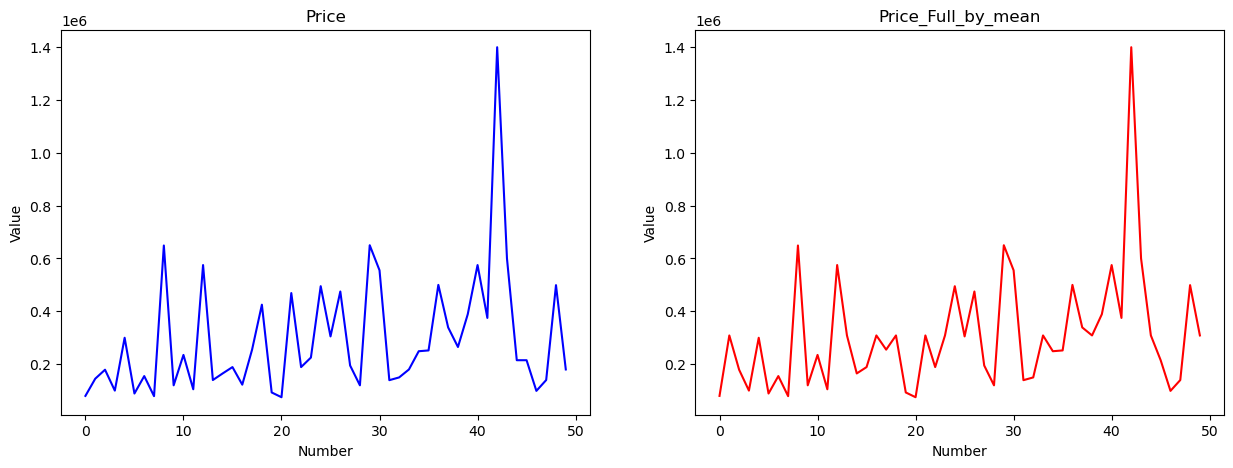

In [40]:
df_smp = df_smp1[:50]

price = df_smp["price"].copy()
status = df_smp["status"].copy()

#создаем 20 процентов пропусков
price[price.sample(len(price)//5).index] = None
status[status.sample(len(status)//5).index] = None

#заполнение константой
def full(arr, s):
    # Создаем копию массива/серии для работы
    tmp = arr.copy()
    
    # Для числовых
    if s == "mean":
        c = tmp[~(tmp.isnull())].mean()  # tmp теперь Series, а не функция
    elif s == "median":
        c = tmp[~(tmp.isnull())].median()
    elif s == "moda":
        # Для моды нужно отдельно обработать, т.к. mode() возвращает Series
        mode_values = tmp[~(tmp.isnull())].mode()
        c = mode_values[0] if len(mode_values) > 0 else None
    
    # Заполняем пропуски
    tmp[tmp.isnull()] = c
    return tmp

price_full_mean = full(price, "mean")
x = np.arange(0, len(price))
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
ax1.plot(x, df_smp.price, color="blue")
ax2.plot(x, price_full_mean, color="red")
ax1.set_ylabel("Value")
ax1.set_xlabel("Number")
ax1.set_title("Price")

ax2.set_ylabel("Value")
ax2.set_xlabel("Number")
ax2.set_title("Price_Full_by_mean")

plt.show()

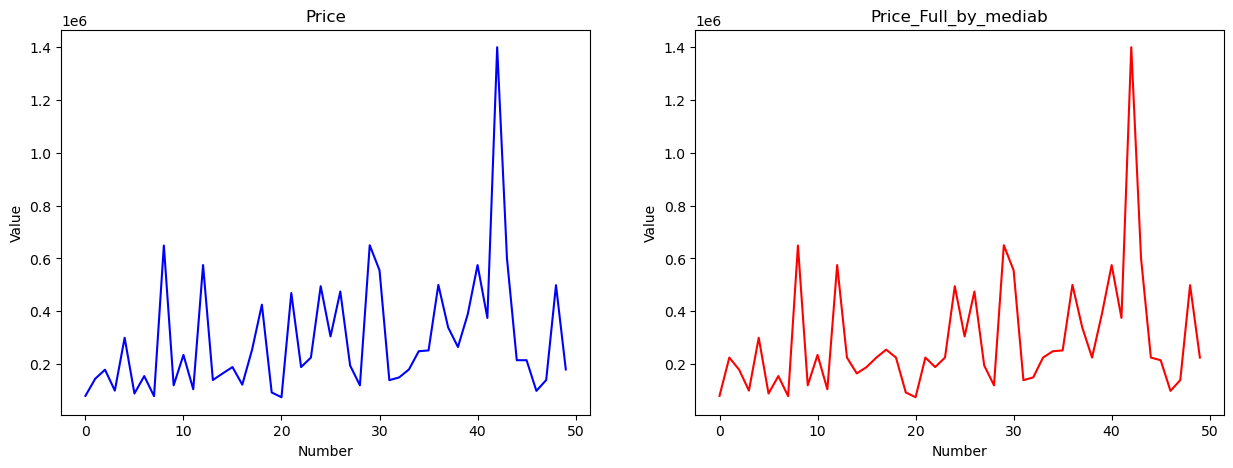

In [41]:
price_full_median = full(price, "median")
x = np.arange(0, len(price))
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
ax1.plot(x, df_smp.price, color="blue")
ax2.plot(x, price_full_median, color="red")
ax1.set_ylabel("Value")
ax1.set_xlabel("Number")
ax1.set_title("Price")

ax2.set_ylabel("Value")
ax2.set_xlabel("Number")
ax2.set_title("Price_Full_by_mediab")

plt.show()

In [42]:
print("Евклидово расстояние между price и price_full_mean: ", np.linalg.norm(df_smp.price[:50] - price_full_mean))
print("Евклидово расстояние между price и price_full_median: ", np.linalg.norm(df_smp.price[:50] - price_full_median))


Евклидово расстояние между price и price_full_mean:  424205.65442954673
Евклидово расстояние между price и price_full_median:  359746.0910142041


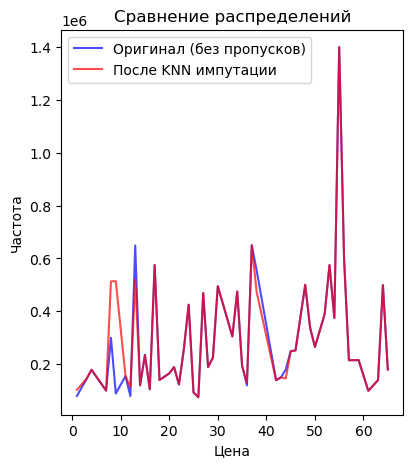

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Исправляем только критичные ошибки, сохраняя вашу логику
knn = KNeighborsRegressor(n_neighbors=3, weights="distance")  # исправлена опечатка: n_neighbours -> n_neighbors
scaler = StandardScaler()

# Выделяем таргет
price = df_smp["price"].copy()

# Создаем 20 процентов пропусков
missing_indices = price.sample(frac=0.2).index
price_with_missing = price.copy()
price_with_missing.loc[missing_indices] = np.nan

# Выделяем train и test
train_idx = price_with_missing[~price_with_missing.isnull()].index
test_idx = price_with_missing[price_with_missing.isnull()].index

X_train = df_smp.loc[train_idx, :][numerical]
X_test = df_smp.loc[test_idx, :][numerical]
y_train = price_with_missing[train_idx]

# Стандартизируем (исправляем метод)
X_train_scaled = scaler.fit_transform(X_train)  # fit_transform для тренировочных данных
X_test_scaled = scaler.transform(X_test)        # transform для тестовых данных

# Обучаем и предсказываем
knn.fit(X_train_scaled, y_train)
y_test = knn.predict(X_test_scaled)

# Заполняем пропуски
price_imputed = price_with_missing.copy()
price_imputed[test_idx] = y_test

# График для сравнения
plt.figure(figsize=(15, 5))

# График 1: Сравнение распределений
plt.subplot(1, 3, 1)
plt.plot(df_smp["price"], alpha=0.7, label='Оригинал (без пропусков)', color='blue')
plt.plot(price_imputed, alpha=0.7, label='После KNN импутации', color='red')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Сравнение распределений')
plt.legend()

In [44]:
print("Евклидово расстояние между price и price_full_median: ", np.linalg.norm(df_smp.price - price_imputed))

Евклидово расстояние между price и price_full_median:  501988.5715495806


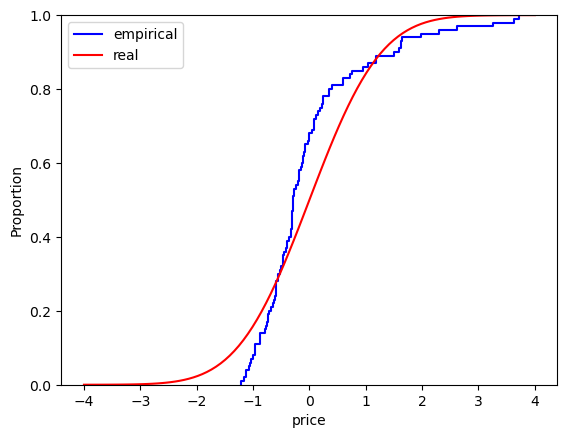

In [45]:
little = df_smp1["price"].sample(100).copy()# будем проводить анализ на нормальность для наших данный длины 100
little -= little.mean()
little /= little.std()
sns.ecdfplot(little, color="blue", label="empirical")

x = np.linspace(-4, 4, 100)
y = stats.norm.cdf(x)  # PDF стандартного нормального распределения
plt.plot(x, y, color="red", label="real")
plt.legend()


Text(0.5, 0, 'level*100')

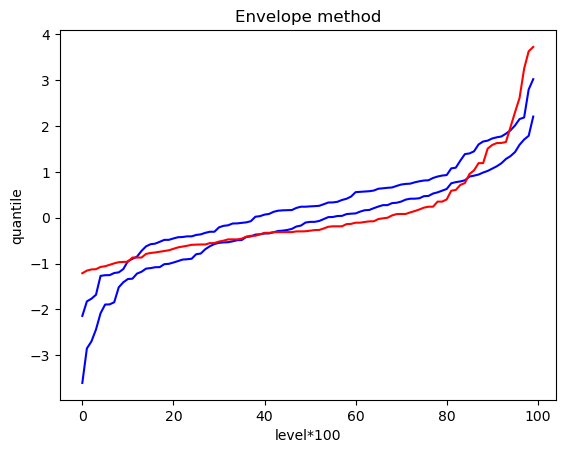

In [46]:
# метод огибающих
#генерируем n нормальных выборок размера 100 берем порядковый статистики и составляем из них интервалы
def envelope(n):
    #создаем матрицу n * 100
    tmp = np.array([sorted(np.random.normal(size = 100)) for i in range(n)])
    return [tmp.min(axis=0), tmp.max(axis=0)]

plt.plot(range(0, 100), envelope(10)[0], color="blue")
plt.plot(range(0, 100), envelope(10)[1], color="blue")
plt.plot(range(0, 100), sorted(little), color="red")
plt.title("Envelope method")
plt.ylabel("quantile")
plt.xlabel("level*100")

In [47]:
from scipy.stats import anderson, kstest, shapiro
from statsmodels.stats.diagnostic import lilliefors

# 1. Критерий Колмогорова-Смирнова
print("\n1. КРИТЕРИЙ КОЛМОГОРОВА-СМИРНОВА:")
# Оцениваем параметры из данных
params = stats.norm.fit(little)
ks_stat, ks_pvalue = kstest(little, 'norm', params)
print(f"   Статистика: {ks_stat:.4f}")
print(f"   p-value: {ks_pvalue:.4f}")
if ks_pvalue > 0.05:
    print("Не отвергаем: данные соответствуют нормальному распределению")
else:
    print("Отвергаем: данные не соответствуют нормальному распределению")

# 2. Критерий Шапиро-Уилка
print("\n2. КРИТЕРИЙ ШАПИРО-УИЛКА:")
shapiro_stat, shapiro_pvalue = shapiro(little)
print(f"   Статистика: {shapiro_stat:.4f}")
print(f"   p-value: {shapiro_pvalue:.4f}")
if shapiro_pvalue > 0.05:
    print("Не отвергаем: данные соответствуют нормальному распределению")
else:
    print("Отвергаем: данные не соответствуют нормальному распределению")

# 3. Критерий Андерсона-Дарлинга
print("\n3. КРИТЕРИЙ АНДЕРСОНА-ДАРЛИНГА:")
anderson_result = anderson(little)
print(f"   Статистика: {anderson_result.statistic:.4f}")
print("   Критические значения:")
significance_levels = [15, 10, 5, 2.5, 1]  # проценты
for i, sl in enumerate(significance_levels):
    critical_value = anderson_result.critical_values[i]
    print(f"     {sl}%: {critical_value:.4f}", end="")
    if anderson_result.statistic < critical_value:
        print(" Yes")
    else:
        print(" No")

# 4. Критерий Крамера-фон-Мизеса
print("\n4. КРИТЕРИЙ КРАМЕРА-ФОН-МИЗЕСА:")
# Используем реализацию из scipy
class CramerVonMisesResult:
    def __init__(self, statistic, pvalue):
        self.statistic = statistic
        self.pvalue = pvalue

def cramervonmises_normal(x):
    """Критерий Крамера-фон-Мизеса для нормальности"""
    from scipy.stats import cramervonmises
    # Стандартизуем данные
    x_standardized = (x - np.mean(x)) / np.std(x, ddof=1)
    result = cramervonmises(x_standardized, 'norm')
    return CramerVonMisesResult(result.statistic, result.pvalue)

cvm_result = cramervonmises_normal(little)
print(f"   Статистика: {cvm_result.statistic:.4f}")
print(f"   p-value: {cvm_result.pvalue:.4f}")
if cvm_result.pvalue > 0.05:
    print("Не отвергаем: данные соответствуют нормальному распределению")
else:
    print("Отвергаем: данные не соответствуют нормальному распределению")

# 5. Критерий Колмогорова-Смирнова (модификация Лиллиефорса)
print("\n5. КРИТЕРИЙ ЛИЛЛИЕФОРСА (модификация Колмогорова-Смирнова):")
# Используем statsmodels для критерия Лиллиефорса
from statsmodels.stats.diagnostic import lilliefors
lillie_stat, lillie_pvalue = lilliefors(little, dist='norm')
print(f"   Статистика: {lillie_stat:.4f}")
print(f"   p-value: {lillie_pvalue:.4f}")
if lillie_pvalue > 0.05:
    print("Не отвергаем: данные соответствуют нормальному распределению")
else:
    print("Отвергаем: данные не соответствуют нормальному распределению")
    
# 6. Критерий Шапиро-Франсия
print("\n6. КРИТЕРИЙ ШАПИРО-ФРАНСИЯ:")
def shapiro_francia(x):
    """Критерий Шапиро-Франсия для нормальности"""
    from scipy.stats import norm
    n = len(x)
    x_sorted = np.sort(x)
    
    # Вычисляем ожидаемые нормальные порядковые статистики
    expected_normals = norm.ppf((np.arange(1, n+1) - 3/8) / (n + 1/4))
    
    # Вычисляем статистику Шапиро-Франсия
    numerator = np.sum(expected_normals * x_sorted)**2
    denominator = np.sum(expected_normals**2) * np.sum((x_sorted - np.mean(x))**2)
    W = numerator / denominator
    
    # Преобразуем статистику для получения p-value (приближенно)
    # Используем приближение Royston (1993)
    u = np.log(n)
    v = np.log(u)
    mu = -1.2725 + 1.0521 * (v - u)
    sigma = 1.0308 - 0.26758 * (v + 2/u)
    
    z = (np.log(1 - W) - mu) / sigma
    p_value = 1 - norm.cdf(z)
    
    return W, p_value

sf_stat, sf_pvalue = shapiro_francia(little)
print(f"   Статистика: {sf_stat:.4f}")
print(f"   p-value: {sf_pvalue:.4f}")
if sf_pvalue > 0.05:
    print("Не отвергаем: данные соответствуют нормальному распределению")
else:
    print("Отвергаем: данные не соответствуют нормальному распределению")

# Сводная таблица результатов
print("\n" + "=" * 70)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("=" * 70)

results = [
    ("Колмогорова-Смирнова", ks_stat, ks_pvalue),
    ("Шапиро-Уилка", shapiro_stat, shapiro_pvalue),
    ("Андерсона-Дарлинга", anderson_result.statistic, "N/A"),  # p-value не предоставляется
    ("Крамера-фон-Мизеса", cvm_result.statistic, cvm_result.pvalue),
    ("Лиллиефорса", lillie_stat, lillie_pvalue),
    ("Шапиро-Франсия", sf_stat, sf_pvalue)
]

print(f"{'Критерий':<25} {'Статистика':<12} {'p-value':<10} {'Вывод':<10}")
print("-" * 60)
for name, stat, pval in results:
    if pval == "N/A":
        conclusion = "Сравнить с критич. знач."
    elif pval > 0.05:
        conclusion = "Нормальность"
    else:
        conclusion = "Не нормальность"
    print(f"{name:<25} {stat:<12.4f} {str(pval):<10} {conclusion:<10}")


1. КРИТЕРИЙ КОЛМОГОРОВА-СМИРНОВА:
   Статистика: 0.1877
   p-value: 0.0015
Отвергаем: данные не соответствуют нормальному распределению

2. КРИТЕРИЙ ШАПИРО-УИЛКА:
   Статистика: 0.8182
   p-value: 0.0000
Отвергаем: данные не соответствуют нормальному распределению

3. КРИТЕРИЙ АНДЕРСОНА-ДАРЛИНГА:
   Статистика: 5.5483
   Критические значения:
     15%: 0.5550 No
     10%: 0.6320 No
     5%: 0.7590 No
     2.5%: 0.8850 No
     1%: 1.0530 No

4. КРИТЕРИЙ КРАМЕРА-ФОН-МИЗЕСА:
   Статистика: 1.0072
   p-value: 0.0023
Отвергаем: данные не соответствуют нормальному распределению

5. КРИТЕРИЙ ЛИЛЛИЕФОРСА (модификация Колмогорова-Смирнова):
   Статистика: 0.1879
   p-value: 0.0010
Отвергаем: данные не соответствуют нормальному распределению

6. КРИТЕРИЙ ШАПИРО-ФРАНСИЯ:
   Статистика: 0.8170
   p-value: 0.0000
Отвергаем: данные не соответствуют нормальному распределению

СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
Критерий                  Статистика   p-value    Вывод     
------------------------------------

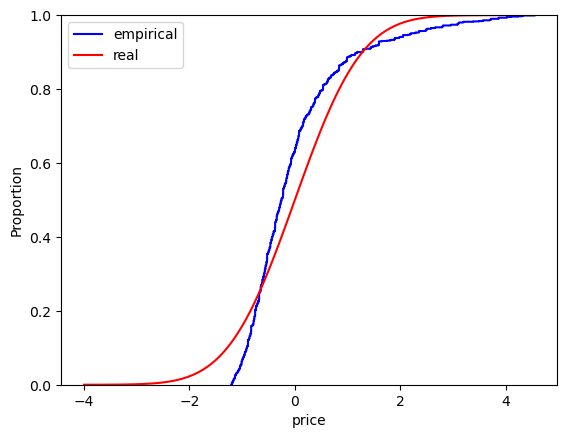

In [48]:
big = df_smp1["price"].sample(1000).copy()# будем проводить анализ на нормальность для наших данный длины 1000
big -= big.mean()
big /= big.std()
sns.ecdfplot(big, color="blue", label="empirical")

x = np.linspace(-4, 4, 100)
y = stats.norm.cdf(x)  # PDF стандартного нормального распределения
plt.plot(x, y, color="red", label="real")
plt.legend()

Text(0.5, 0, 'level*100')

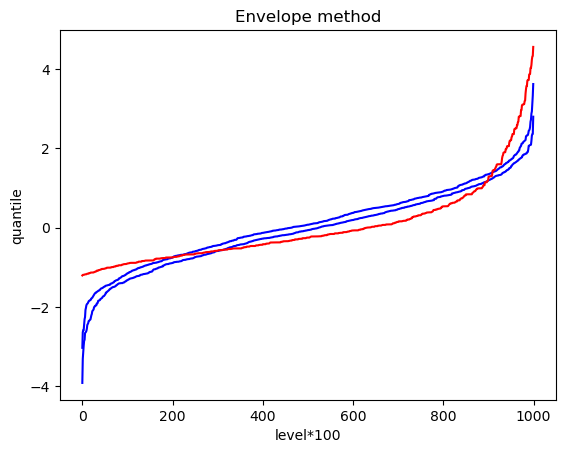

In [49]:
# метод огибающих
#генерируем n нормальных выборок размера 100 берем порядковый статистики и составляем из них интервалы
def envelope(n):
    #создаем матрицу n * 100
    tmp = np.array([sorted(np.random.normal(size = 1000)) for i in range(n)])
    return [tmp.min(axis=0), tmp.max(axis=0)]

plt.plot(range(0, 1000), envelope(10)[0], color="blue")
plt.plot(range(0, 1000), envelope(10)[1], color="blue")
plt.plot(range(0, 1000), sorted(big), color="red")
plt.title("Envelope method")
plt.ylabel("quantile")
plt.xlabel("level*100")

In [50]:
from scipy.stats import kstest

print(kstest(norm_little, 'norm').pvalue)

0.996522550043494


In [51]:
from scipy.stats import anderson, kstest, shapiro
from statsmodels.stats.diagnostic import lilliefors

# 1. Критерий Колмогорова-Смирнова
print("\n1. КРИТЕРИЙ КОЛМОГОРОВА-СМИРНОВА:")
# Оцениваем параметры из данных
params = stats.norm.fit(big)
ks_stat, ks_pvalue = kstest(big, 'norm', params)
print(f"   Статистика: {ks_stat:.4f}")
print(f"   p-value: {ks_pvalue:.4f}")
if ks_pvalue > 0.05:
    print("Не отвергаем: данные соответствуют нормальному распределению")
else:
    print("Отвергаем: данные не соответствуют нормальному распределению")

# 2. Критерий Шапиро-Уилка
print("\n2. КРИТЕРИЙ ШАПИРО-УИЛКА:")
shapiro_stat, shapiro_pvalue = shapiro(big)
print(f"   Статистика: {shapiro_stat:.4f}")
print(f"   p-value: {shapiro_pvalue:.4f}")
if shapiro_pvalue > 0.05:
    print("Не отвергаем: данные соответствуют нормальному распределению")
else:
    print("Отвергаем: данные не соответствуют нормальному распределению")

# 3. Критерий Андерсона-Дарлинга
print("\n3. КРИТЕРИЙ АНДЕРСОНА-ДАРЛИНГА:")
anderson_result = anderson(big)
print(f"   Статистика: {anderson_result.statistic:.4f}")
print("   Критические значения:")
significance_levels = [15, 10, 5, 2.5, 1]  # проценты
for i, sl in enumerate(significance_levels):
    critical_value = anderson_result.critical_values[i]
    print(f"     {sl}%: {critical_value:.4f}", end="")
    if anderson_result.statistic < critical_value:
        print(" Yes")
    else:
        print(" No")

# 4. Критерий Крамера-фон-Мизеса
print("\n4. КРИТЕРИЙ КРАМЕРА-ФОН-МИЗЕСА:")
# Используем реализацию из scipy
class CramerVonMisesResult:
    def __init__(self, statistic, pvalue):
        self.statistic = statistic
        self.pvalue = pvalue

def cramervonmises_normal(x):
    """Критерий Крамера-фон-Мизеса для нормальности"""
    from scipy.stats import cramervonmises
    # Стандартизуем данные
    x_standardized = (x - np.mean(x)) / np.std(x, ddof=1)
    result = cramervonmises(x_standardized, 'norm')
    return CramerVonMisesResult(result.statistic, result.pvalue)

cvm_result = cramervonmises_normal(big)
print(f"   Статистика: {cvm_result.statistic:.4f}")
print(f"   p-value: {cvm_result.pvalue:.4f}")
if cvm_result.pvalue > 0.05:
    print("Не отвергаем: данные соответствуют нормальному распределению")
else:
    print("Отвергаем: данные не соответствуют нормальному распределению")

# 5. Критерий Колмогорова-Смирнова (модификация Лиллиефорса)
print("\n5. КРИТЕРИЙ ЛИЛЛИЕФОРСА (модификация Колмогорова-Смирнова):")
# Используем statsmodels для критерия Лиллиефорса
from statsmodels.stats.diagnostic import lilliefors
lillie_stat, lillie_pvalue = lilliefors(big, dist='norm')
print(f"   Статистика: {lillie_stat:.4f}")
print(f"   p-value: {lillie_pvalue:.4f}")
if lillie_pvalue > 0.05:
    print("Не отвергаем: данные соответствуют нормальному распределению")
else:
    print("Отвергаем: данные не соответствуют нормальному распределению")
    
# 6. Критерий Шапиро-Франсия
print("\n6. КРИТЕРИЙ ШАПИРО-ФРАНСИЯ:")
def shapiro_francia(x):
    """Критерий Шапиро-Франсия для нормальности"""
    from scipy.stats import norm
    n = len(x)
    x_sorted = np.sort(x)
    
    # Вычисляем ожидаемые нормальные порядковые статистики
    expected_normals = norm.ppf((np.arange(1, n+1) - 3/8) / (n + 1/4))
    
    # Вычисляем статистику Шапиро-Франсия
    numerator = np.sum(expected_normals * x_sorted)**2
    denominator = np.sum(expected_normals**2) * np.sum((x_sorted - np.mean(x))**2)
    W = numerator / denominator
    
    # Преобразуем статистику для получения p-value (приближенно)
    # Используем приближение Royston (1993)
    u = np.log(n)
    v = np.log(u)
    mu = -1.2725 + 1.0521 * (v - u)
    sigma = 1.0308 - 0.26758 * (v + 2/u)
    
    z = (np.log(1 - W) - mu) / sigma
    p_value = 1 - norm.cdf(z)
    
    return W, p_value

sf_stat, sf_pvalue = shapiro_francia(big)
print(f"   Статистика: {sf_stat:.4f}")
print(f"   p-value: {sf_pvalue:.4f}")
if sf_pvalue > 0.05:
    print("Не отвергаем: данные соответствуют нормальному распределению")
else:
    print("Отвергаем: данные не соответствуют нормальному распределению")

# Сводная таблица результатов
print("\n" + "=" * 70)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("=" * 70)

results = [
    ("Колмогорова-Смирнова", ks_stat, ks_pvalue),
    ("Шапиро-Уилка", shapiro_stat, shapiro_pvalue),
    ("Андерсона-Дарлинга", anderson_result.statistic, "N/A"),  # p-value не предоставляется
    ("Крамера-фон-Мизеса", cvm_result.statistic, cvm_result.pvalue),
    ("Лиллиефорса", lillie_stat, lillie_pvalue),
    ("Шапиро-Франсия", sf_stat, sf_pvalue)
]

print(f"{'Критерий':<25} {'Статистика':<12} {'p-value':<10} {'Вывод':<10}")
print("-" * 60)
for name, stat, pval in results:
    if pval == "N/A":
        conclusion = "Сравнить с критич. знач."
    elif pval > 0.05:
        conclusion = "Нормальность"
    else:
        conclusion = "Не нормальность"
    print(f"{name:<25} {stat:<12.4f} {str(pval):<10} {conclusion:<10}")


1. КРИТЕРИЙ КОЛМОГОРОВА-СМИРНОВА:
   Статистика: 0.1539
   p-value: 0.0000
Отвергаем: данные не соответствуют нормальному распределению

2. КРИТЕРИЙ ШАПИРО-УИЛКА:
   Статистика: 0.8273
   p-value: 0.0000
Отвергаем: данные не соответствуют нормальному распределению

3. КРИТЕРИЙ АНДЕРСОНА-ДАРЛИНГА:
   Статистика: 46.1714
   Критические значения:
     15%: 0.5740 No
     10%: 0.6530 No
     5%: 0.7840 No
     2.5%: 0.9140 No
     1%: 1.0880 No

4. КРИТЕРИЙ КРАМЕРА-ФОН-МИЗЕСА:
   Статистика: 7.7476
   p-value: 0.0000
Отвергаем: данные не соответствуют нормальному распределению

5. КРИТЕРИЙ ЛИЛЛИЕФОРСА (модификация Колмогорова-Смирнова):
   Статистика: 0.1539
   p-value: 0.0010
Отвергаем: данные не соответствуют нормальному распределению

6. КРИТЕРИЙ ШАПИРО-ФРАНСИЯ:
   Статистика: 0.8275
   p-value: 0.0000
Отвергаем: данные не соответствуют нормальному распределению

СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
Критерий                  Статистика   p-value    Вывод     
-----------------------------------